# Import libraries

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

# Make a dataset

In [158]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

# See distribution

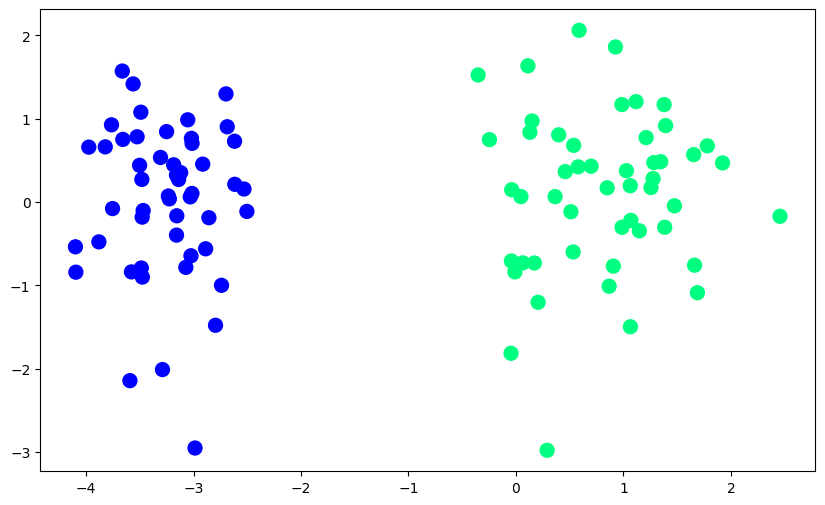

In [159]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

# Train Test Split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Apply LogisticRegression

In [161]:
reg1 = LogisticRegression(penalty=None,solver='sag')
reg1.fit(X_train,y_train)
r2_score(y_test,reg1.predict(X_test))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1.0

In [162]:
print(reg1.coef_)
print(reg1.intercept_)

[[4.73401024 0.26676578]]
[5.65718837]


In [163]:
m = -(reg1.coef_[0][0]/reg1.coef_[0][1])
c = -(reg1.intercept_/reg1.coef_[0][1])

x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

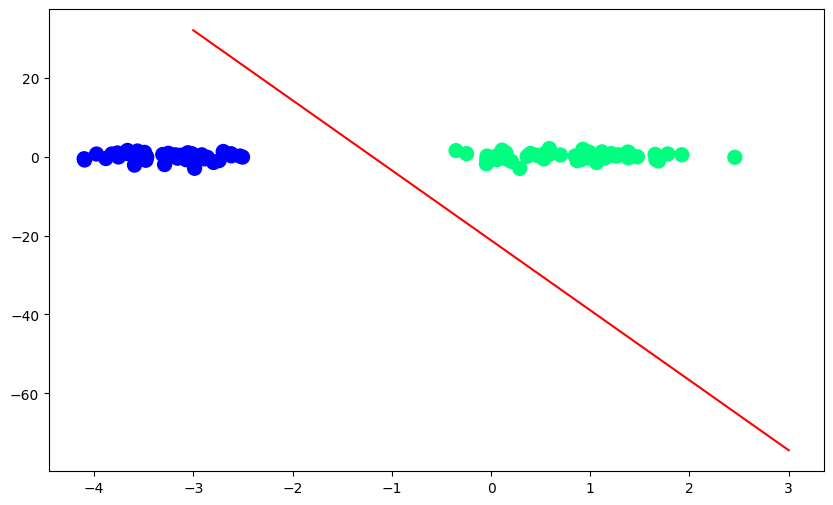

In [164]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.plot(x_input,y_input,color='red')

# Custome Logistic Regression

In [165]:
class CustomLogisticRegression:
  def __init__(self,lr=0.001,epochs=1000):
    self.lr = lr
    self.epochs = epochs
    self.weights = None
    self.intercept_ = None
    self.coef_ = None

  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)
    n_samples, n_features = X_train.shape
    self.weights = np.ones(n_features)

    for _ in range(self.epochs):
      y_hat = self._sigmoid(np.dot(X_train,self.weights))
      self.weights = self.weights + self.lr*(np.dot((y_train-y_hat), X_train)/n_features)

      self.intercept_ = self.weights[0]
      self.coef_ = self.weights[1:]

  def predict(self,X):
    linear_model = np.dot(X,self.coef_) + self.intercept_
    y_predicted = self._sigmoid(linear_model)
    y_predicted_cls = [1 if i>0.5 else 0 for i in y_predicted]
    return y_predicted_cls

  def _sigmoid(self,x):
    return 1/(1+np.exp(-x))

In [166]:
reg2 = CustomLogisticRegression(epochs=100000)
reg2.fit(X_train,y_train)
r2_score(y_test,reg2.predict(X_test))

1.0

# Build New Graph

In [167]:
print(reg2.coef_)
print(reg2.intercept_)

[4.93582772 0.27457147]
5.967218209104992


In [168]:
m = -(reg2.coef_[0]/reg2.coef_[1])
c = -(reg2.intercept_/reg2.coef_[1])

x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + c

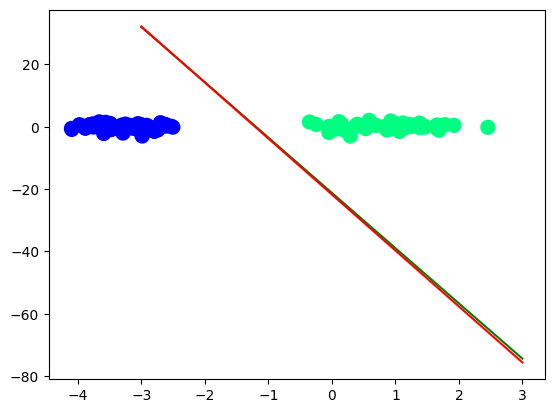

In [169]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.plot(x_input,y_input,color='green')
plt.plot(x_input2,y_input2,color='red')

# Compare two line

In [170]:
print(f'Coef: {reg1.coef_[0]} vs {reg2.coef_}')
print(f'Intercept: {reg1.intercept_} vs {reg2.intercept_}')

Coef: [4.73401024 0.26676578] vs [4.93582772 0.27457147]
Intercept: [5.65718837] vs 5.967218209104992
